In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from pandas import read_pickle

from inference import gph2xy, diam, nx_dist, nx_dist_closed, l_tot, nb_apex
from simulation import simulation

path = "./Data/M2"

filenames_ = os.listdir(path)
filenames = []

for file in filenames_ :
    if file[-7:] == 'gpickle':
        filenames += [file]

data_exp_open = [] #list of lengths of open segments
data_exp_closed = [] #list of lengths of closed segments
length_exp = 0 #total length
nb_exp = 0 #number of apexes

for file in filenames:
    g = read_pickle(path + '/' + file)
    d = diam(g)
    data_exp_open += nx_dist(g, min_diameter = d*0.6, euclidean=False)
    data_exp_closed += nx_dist_closed(g, min_diameter = d*0.6)
    length_exp += l_tot(g, min_diameter = d*0.6)
    nb_exp += nb_apex(g, min_diameter = d*0.6)

lbdhat_exp = nb_exp/length_exp

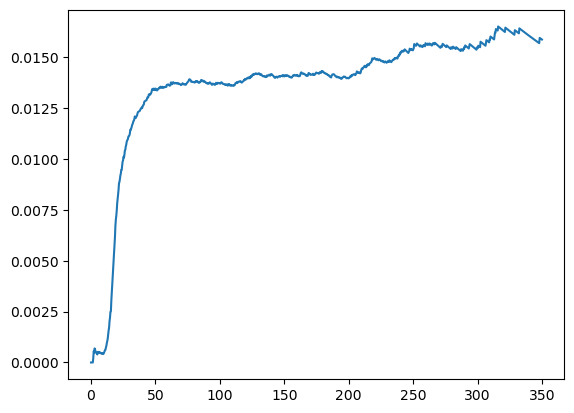

In [2]:
def F_exp(data, x): 
    """
    Compute the empirical tail function of lengths of open segments
    
    Args:
        data (list): list[float] of lengths of open segments
        x (float)
    """
    return len([y for y in data if y > x])/len(data)

X = np.linspace(0.001, 350, 1000)
Y_1_exp = [F_exp(data_exp_open, x) for x in X]
plt.plot(X, -np.log(Y_1_exp)/X)

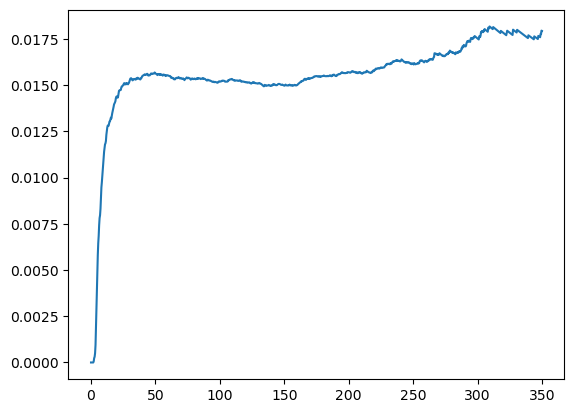

In [3]:
Y_0_exp = [F_exp(data_exp_closed, x) for x in X]
plt.plot(X, -np.log(Y_0_exp)/X)

In [4]:
v = 48.7
b1 = 5.3e-3
b2 = 1.8e-5
lbd = 0.5*(b1 + np.sqrt(b1**2 + 4*b2))

data_sim = simulation(b1, b2, 10, 15*v)

start of simulation
time of sim = 2.794901132583618s
mean time = 0.2794901132583618s


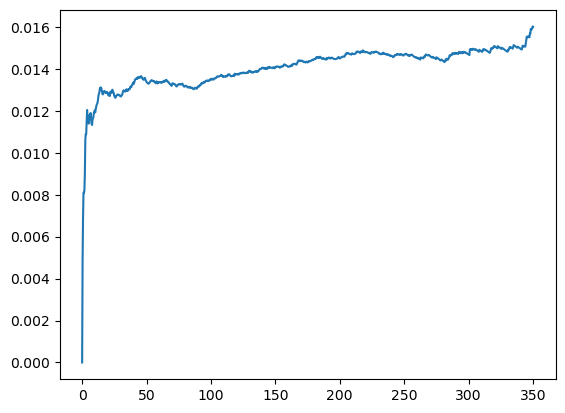

In [5]:
def F_1_sim(data, x): 
    
    n = len(data[0])
    a = 0
    
    for i in range(n):
        b = len([y for y in data[0][i] if y > x])
        a += b/len(data[0][i])
        
    return a/n

def F_0_sim(data, x): 
    
    n = len(data[0])
    a = 0
    
    for i in range(n):
        b = len([y for y in data[1][i] if y > x])
        a += b/len(data[1][i])
        
    return a/n

Y_1_sim = [F_1_sim(data_sim, x) for x in X]
plt.plot(X, -np.log(Y_1_sim)/X)

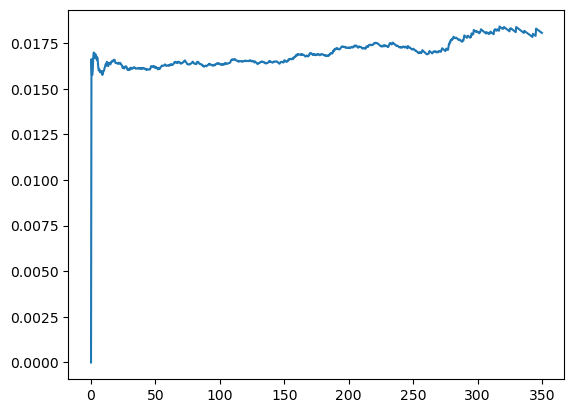

In [6]:
Y_0_sim = [F_0_sim(data_sim, x) for x in X]
plt.plot(X, -np.log(Y_0_sim)/X)

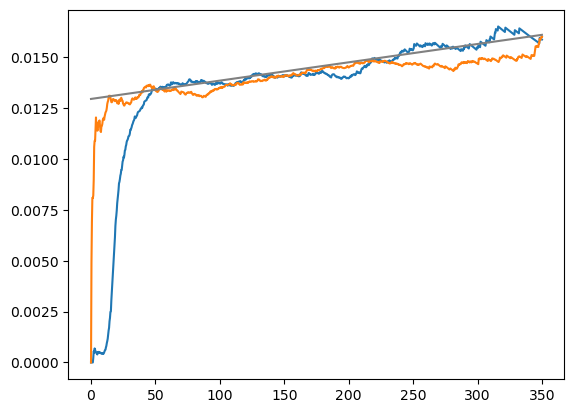

In [7]:
Z_1 = [b1 + lbd + b2/2*x for x in X]
plt.plot(X, -np.log(Y_1_exp)/X)
plt.plot(X, -np.log(Y_1_sim)/X)
plt.plot(X, Z_1, c='0.5')

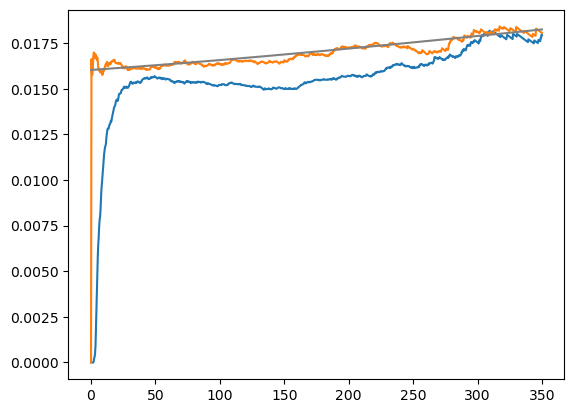

In [8]:
def N1(x):
    return (b1 + b2*x + lbd)*np.exp(-(b1*x + b2/2*x**2 + lbd*x))

def N0(x):
    return N1(x)/((b2*x + lbd)**2)*(b2 + b1*(b2*x+lbd)) + b2*np.exp(-(b1*x + b2/2*x**2 + lbd*x))*(2*b2 + b1*(b2*x+lbd))/((b2*x+lbd)**3)
    
import scipy.integrate as integrate

def int_N0(x):
    return 1 - integrate.quad(N0, 0, x)[0]

Z_0 = [int_N0(x) for x in X]

plt.plot(X, -np.log(Y_0_exp)/X)
plt.plot(X, -np.log(Y_0_sim)/X)
plt.plot(X, -np.log(Z_0)/X, c='0.5')